# Slice Sampling

Given the value $z$ we evaluate $\tilde p(z)$

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand, seed

In [16]:
%config InlineBackend.figure_format = "retina"

In [19]:
def p_hat(x):
    pi1, pi2 = 0.4, 0.6
    return pi1 * np.exp(-(x + 1)**2) + pi2 * np.exp(-(x - 5) **2  / 2)

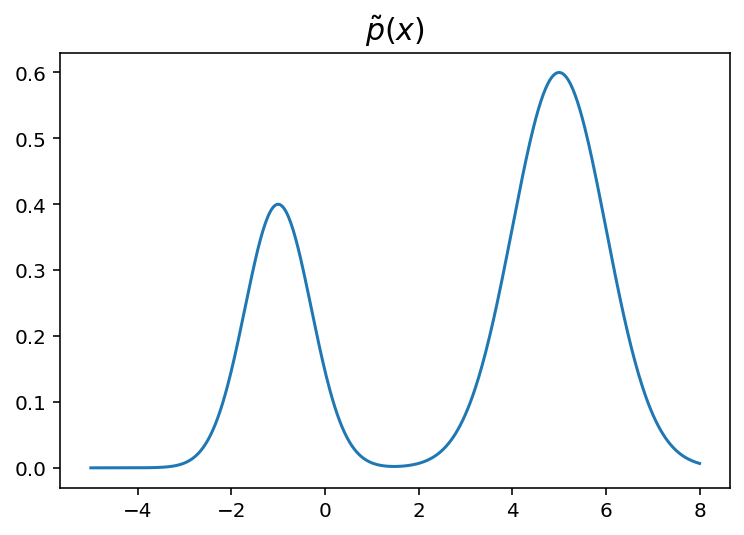

In [24]:
xrange = np.linspace(-5, 8, 500)
plt.plot(xrange, p_hat(xrange))
plt.title(r"$\tilde p(x)$", fontsize=15);

In [37]:
pz

0.14715177648231534

In [186]:
z = -2
pz = p_hat(z)
u = rand() * pz

> One approach to the choice of region involves starting with a region containing $z^{(\tau)}$ having some width $w$ and then testing each of the end points to see if they lie within the slice

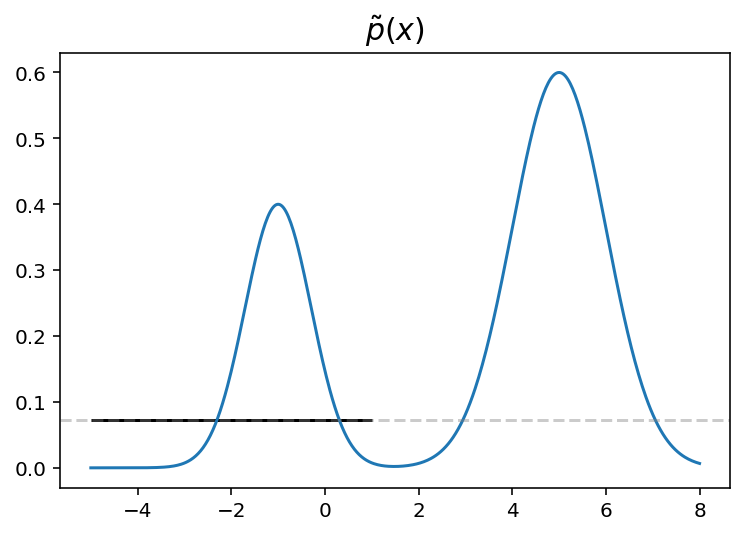

In [187]:
xrange = np.linspace(-5, 8, 500)
plt.plot(xrange, p_hat(xrange))
plt.axhline(y=u, c="tab:gray", linestyle="--", alpha=0.4)
plt.hlines(u, z - w, z + w)
plt.title(r"$\tilde p(x)$", fontsize=15);

In [188]:
w = 3
inc = 2
zmin, zmax = z - w, z + w
while p_hat(zmin) > u:
    zmin -= inc

while p_hat(zmax) > u:
    zmax += inc

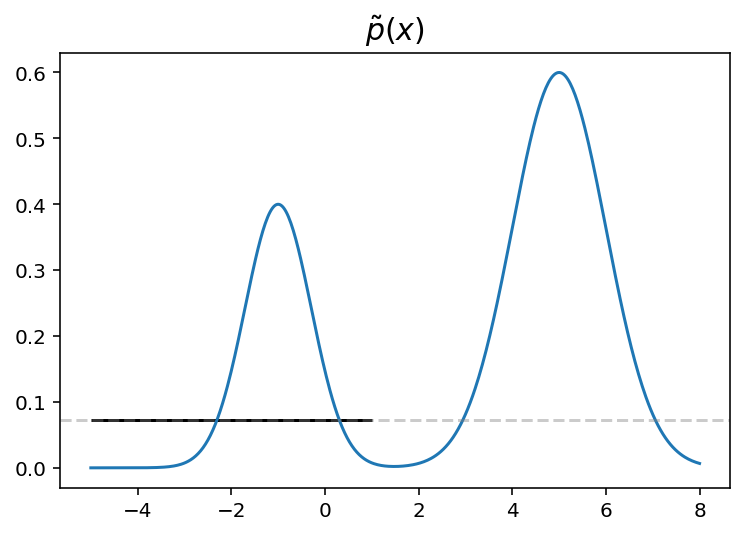

In [189]:
xrange = np.linspace(-5, 8, 500)
plt.plot(xrange, p_hat(xrange))
plt.axhline(y=u, c="tab:gray", linestyle="--", alpha=0.4)
plt.hlines(u, zmin, zmax)
plt.title(r"$\tilde p(x)$", fontsize=15);

In [190]:
seed(3141)
z_prime = rand() * (zmax - zmin) + zmin

In [191]:
if p_hat(z_prime) > u:
    z = z_prime
else:
    zmin_dist = abs(z_prime - zmin)
    zmax_dist = abs(z_prime - zmax)
    if  zmin_dist < zmax_dist:
        zmin = z_prime
    else:
        zmax = z_prime

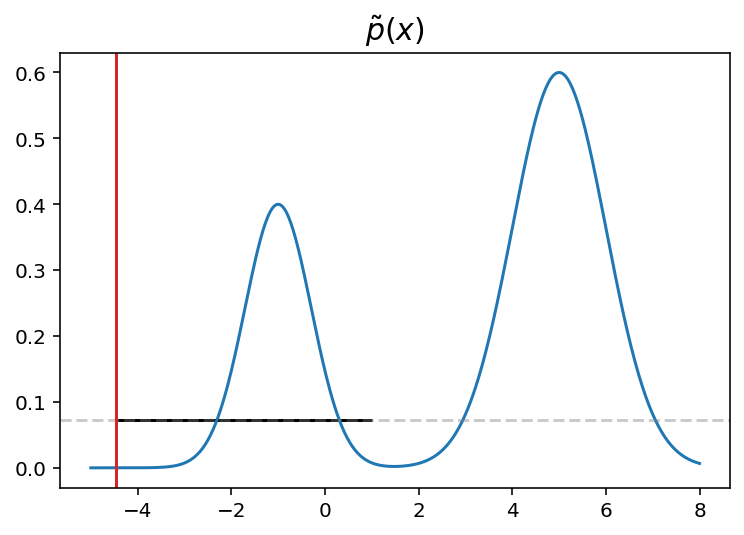

In [192]:
xrange = np.linspace(-5, 8, 500)
plt.plot(xrange, p_hat(xrange))
plt.axhline(y=u, c="tab:gray", linestyle="--", alpha=0.4)
plt.hlines(u, zmin, zmax)
plt.axvline(x=z_prime, c="tab:red")
plt.title(r"$\tilde p(x)$", fontsize=15);

## All together

In [193]:
def one_sample(p_hat, zmin, zmax):        
    z_prime = rand() * (zmax - zmin) + zmin
    if p_hat(z_prime) > u:
        return z_prime
    else:
        zmin_dist = abs(z_prime - zmin)
        zmax_dist = abs(z_prime - zmax)
        if  zmin_dist < zmax_dist:
            zmin = z_prime
        else:
            zmax = z_prime
            
        return one_sample(p_hat, zmin, zmax)

In [212]:
def slice_sampling(p_hat, z_init, w, inc=0.2):
    z = z_init
    pz = p_hat(z)
    u = rand() * pz
    
    zmin, zmax = z - w, z + w
    while p_hat(zmin) > u:
        zmin -= inc

    while p_hat(zmax) > u:
        zmax += inc
        
    znew = one_sample(p_hat, zmin, zmax)
    return znew

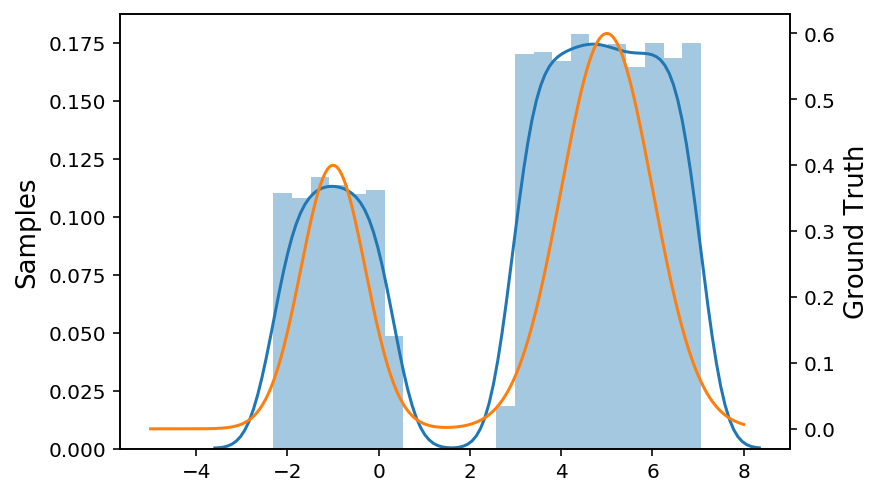

In [235]:
z_vec = []
for _ in range(20_000):
    z = slice_sampling(p_hat, z_init=4, w=5, inc=2)
    z_vec.append(z)

fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.distplot(z_vec, ax=ax)
ax2.plot(xrange, p_hat(xrange), c="tab:orange")
ax.set_ylabel("Samples", fontsize=13);
ax2.set_ylabel("Ground Truth", fontsize=13);

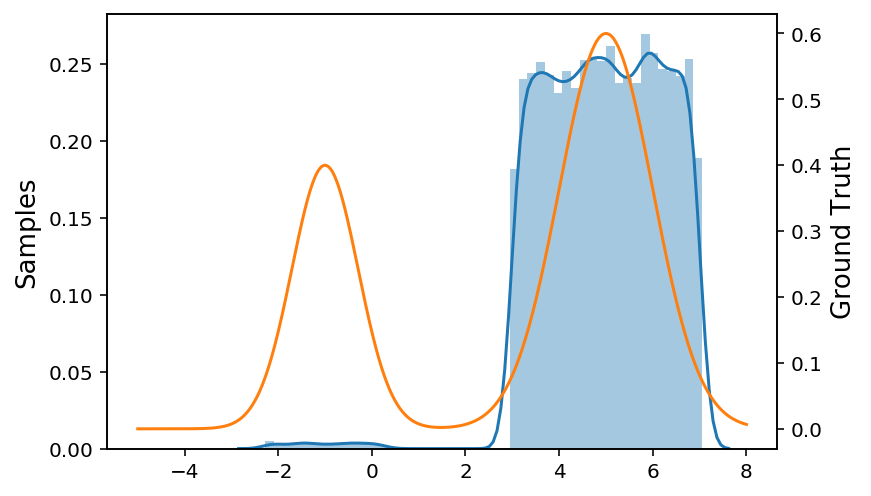

In [237]:
z_vec = []
for _ in range(20_000):
    z = slice_sampling(p_hat, z_init=4, w=1, inc=2)
    z_vec.append(z)

fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.distplot(z_vec, ax=ax)
ax2.plot(xrange, p_hat(xrange), c="tab:orange")
ax.set_ylabel("Samples", fontsize=13);
ax2.set_ylabel("Ground Truth", fontsize=13);